In [ ]:
# Problem Statement = To predict the leaf type (Healthy/Powdery/Rust) using CNN model.

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow
import keras
import seaborn as sns
from matplotlib.pyplot import figure 

In [ ]:
# getting the main paths

In [2]:
train_path = r"C:\Users\revad\Downloads\archive\Train\Train"
test_path = r"C:\Users\revad\Downloads\archive\Test\Test"
valid_path = r"C:\Users\revad\Downloads\archive\Validation\Validation"

In [3]:
categ = ['Healthy', 'Powdery', 'Rust']                    # categories inside

In [4]:
for i in categ:
    train_folder = os.path.join(train_path, i)
print(train_path)

for j in categ:
    test_folder = os.path.join(test_path, j)
print(test_folder)
    
for k in categ:
    valid_folder = os.path.join(valid_path, k)
print(valid_folder)                                                  
                                                                 #joining the two paths so as to be able to read the imgs

C:\Users\revad\Downloads\archive\Train\Train
C:\Users\revad\Downloads\archive\Test\Test\Rust
C:\Users\revad\Downloads\archive\Validation\Validation\Rust


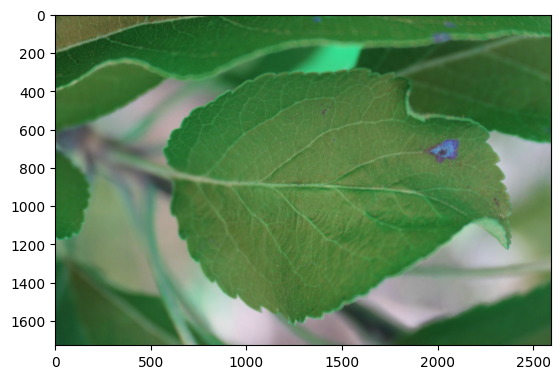

In [5]:
for i in categ:
    train_folder = os.path.join(train_path, i)                      # accessing the imgs by plotting them
                                                                    # Here, we got the rust leaf displayed.
    for images in os.listdir(train_folder):
        image_path = os.path.join(train_folder, images)
        image_array = cv2.imread(image_path)
        plt.imshow(image_array)
        break
       

In [6]:
size = 500                                             # assigning size for resize operation

In [7]:
image_collect = []                                 # assigning labels to the images while collecting them in an empty array

for i in categ:
    train_folder = os.path.join(train_path, i)
    
    label = categ.index(i)
    print('Value of label:',label)
    
    for images in os.listdir(train_folder):
        image_path = os.path.join(train_folder, images)
        image_array = cv2.imread(image_path)
        image_array = cv2.resize(image_array,(size,size))
        image_collect.append([image_array, label])
        

Value of label: 0
Value of label: 1
Value of label: 2


In [8]:
df1 = pd.DataFrame(image_collect)                           # creating a dataframe to check if our train data is balanced

In [9]:
df1.iloc[:,1].value_counts()                                # value_counts for all 3 classes present in the dataset

1
0    458
2    434
1    430
Name: count, dtype: int64

In [10]:
df1

,0,1
0,"[[[98, 178, 115], [91, 173, 106], [94, 179, 11...",0
1,"[[[31, 73, 48], [29, 71, 46], [33, 74, 53], [3...",0
2,"[[[28, 81, 41], [29, 82, 42], [25, 83, 42], [2...",0
3,"[[[32, 116, 81], [36, 120, 85], [36, 120, 85],...",0
4,"[[[28, 65, 25], [29, 66, 26], [33, 71, 29], [4...",0
...,...,...
1317,"[[[79, 70, 121], [77, 67, 118], [91, 78, 140],...",2
1318,"[[[218, 254, 242], [218, 254, 242], [215, 254,...",2
1319,"[[[29, 80, 43], [29, 79, 45], [30, 86, 41], [3...",2
1320,"[[[122, 141, 168], [124, 143, 170], [126, 145,...",2


In [11]:
# train_data is balanced in all 3 categories

In [12]:
# But train data is very less here (less than 500 records!). So we need to carry 'data augmentation'.

In [13]:
# Duplicate data will be created from the original and stored in heap memory using ImageDataGenerator.

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_data_gen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_data_gen.flow_from_directory(r"C:\Users\revad\Downloads\archive\Train\Train", target_size=(225,225), batch_size=32, class_mode='categorical')

Found 1322 images belonging to 3 classes.


In [16]:
valid_generator = test_data_gen.flow_from_directory(r"C:\Users\revad\Downloads\archive\Validation\Validation", target_size=(225,225), batch_size=32, class_mode='categorical') 

Found 60 images belonging to 3 classes.


In [ ]:
# test data will be used only for testing purpose. So here duplicates are generated only for train and validation data.

In [17]:
# Already, there are 1322 imgs in our original train file. 
# We have successfully added the duplicates though they are not reflecting in the total images count. 
# This bcz they are stored in heap memory.

In [18]:
len(image_collect)

1322

In [19]:
x = []                                                                        #Seperating the collected images and labels

for imgs, labels in image_collect:
    x.append(imgs)
    y.append(labels)


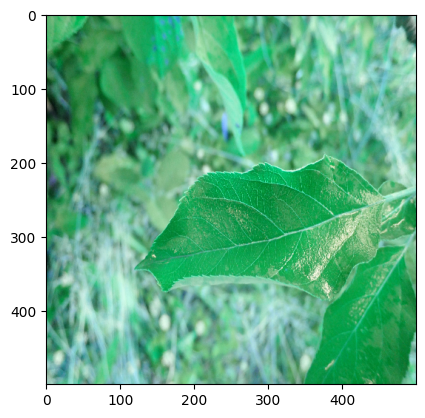

In [20]:
plt.imshow(x[0])                                                                  # This is a healthy leaf

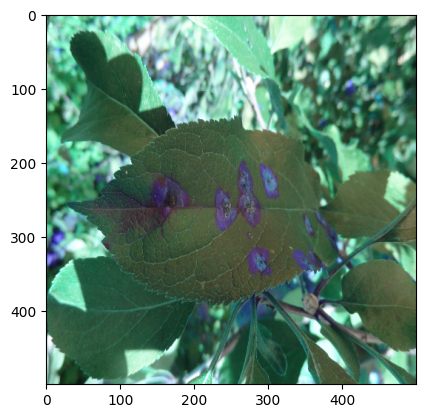

In [21]:
plt.imshow(x[1321])                                                                   # This is a rust leaf 

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [23]:
model = Sequential()                     #initializing the model so that data flows in a sequence from one layer to another

In [24]:
model.add(Conv2D(filters=10, kernel_size=(5,5), input_shape=(225,225,3), activation='relu'))       # Building a CNN network
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())   
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

D:\Software\Anaconda\envs\py310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
# model building 

In [25]:
history = model.fit(train_generator, epochs=5, batch_size=16, validation_data = valid_generator, validation_batch_size=16 )

Epoch 1/5


D:\Software\Anaconda\envs\py310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.3886 - loss: 4.0214 - val_accuracy: 0.5167 - val_loss: 0.9989
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.5188 - loss: 0.9900 - val_accuracy: 0.6000 - val_loss: 0.9459
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.6649 - loss: 0.8868 - val_accuracy: 0.5833 - val_loss: 0.9518
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.7091 - loss: 0.7540 - val_accuracy: 0.6833 - val_loss: 0.7847
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.7557 - loss: 0.6126 - val_accuracy: 0.8000 - val_loss: 0.6633


In [ ]:
# plotting the train and validation accuracy

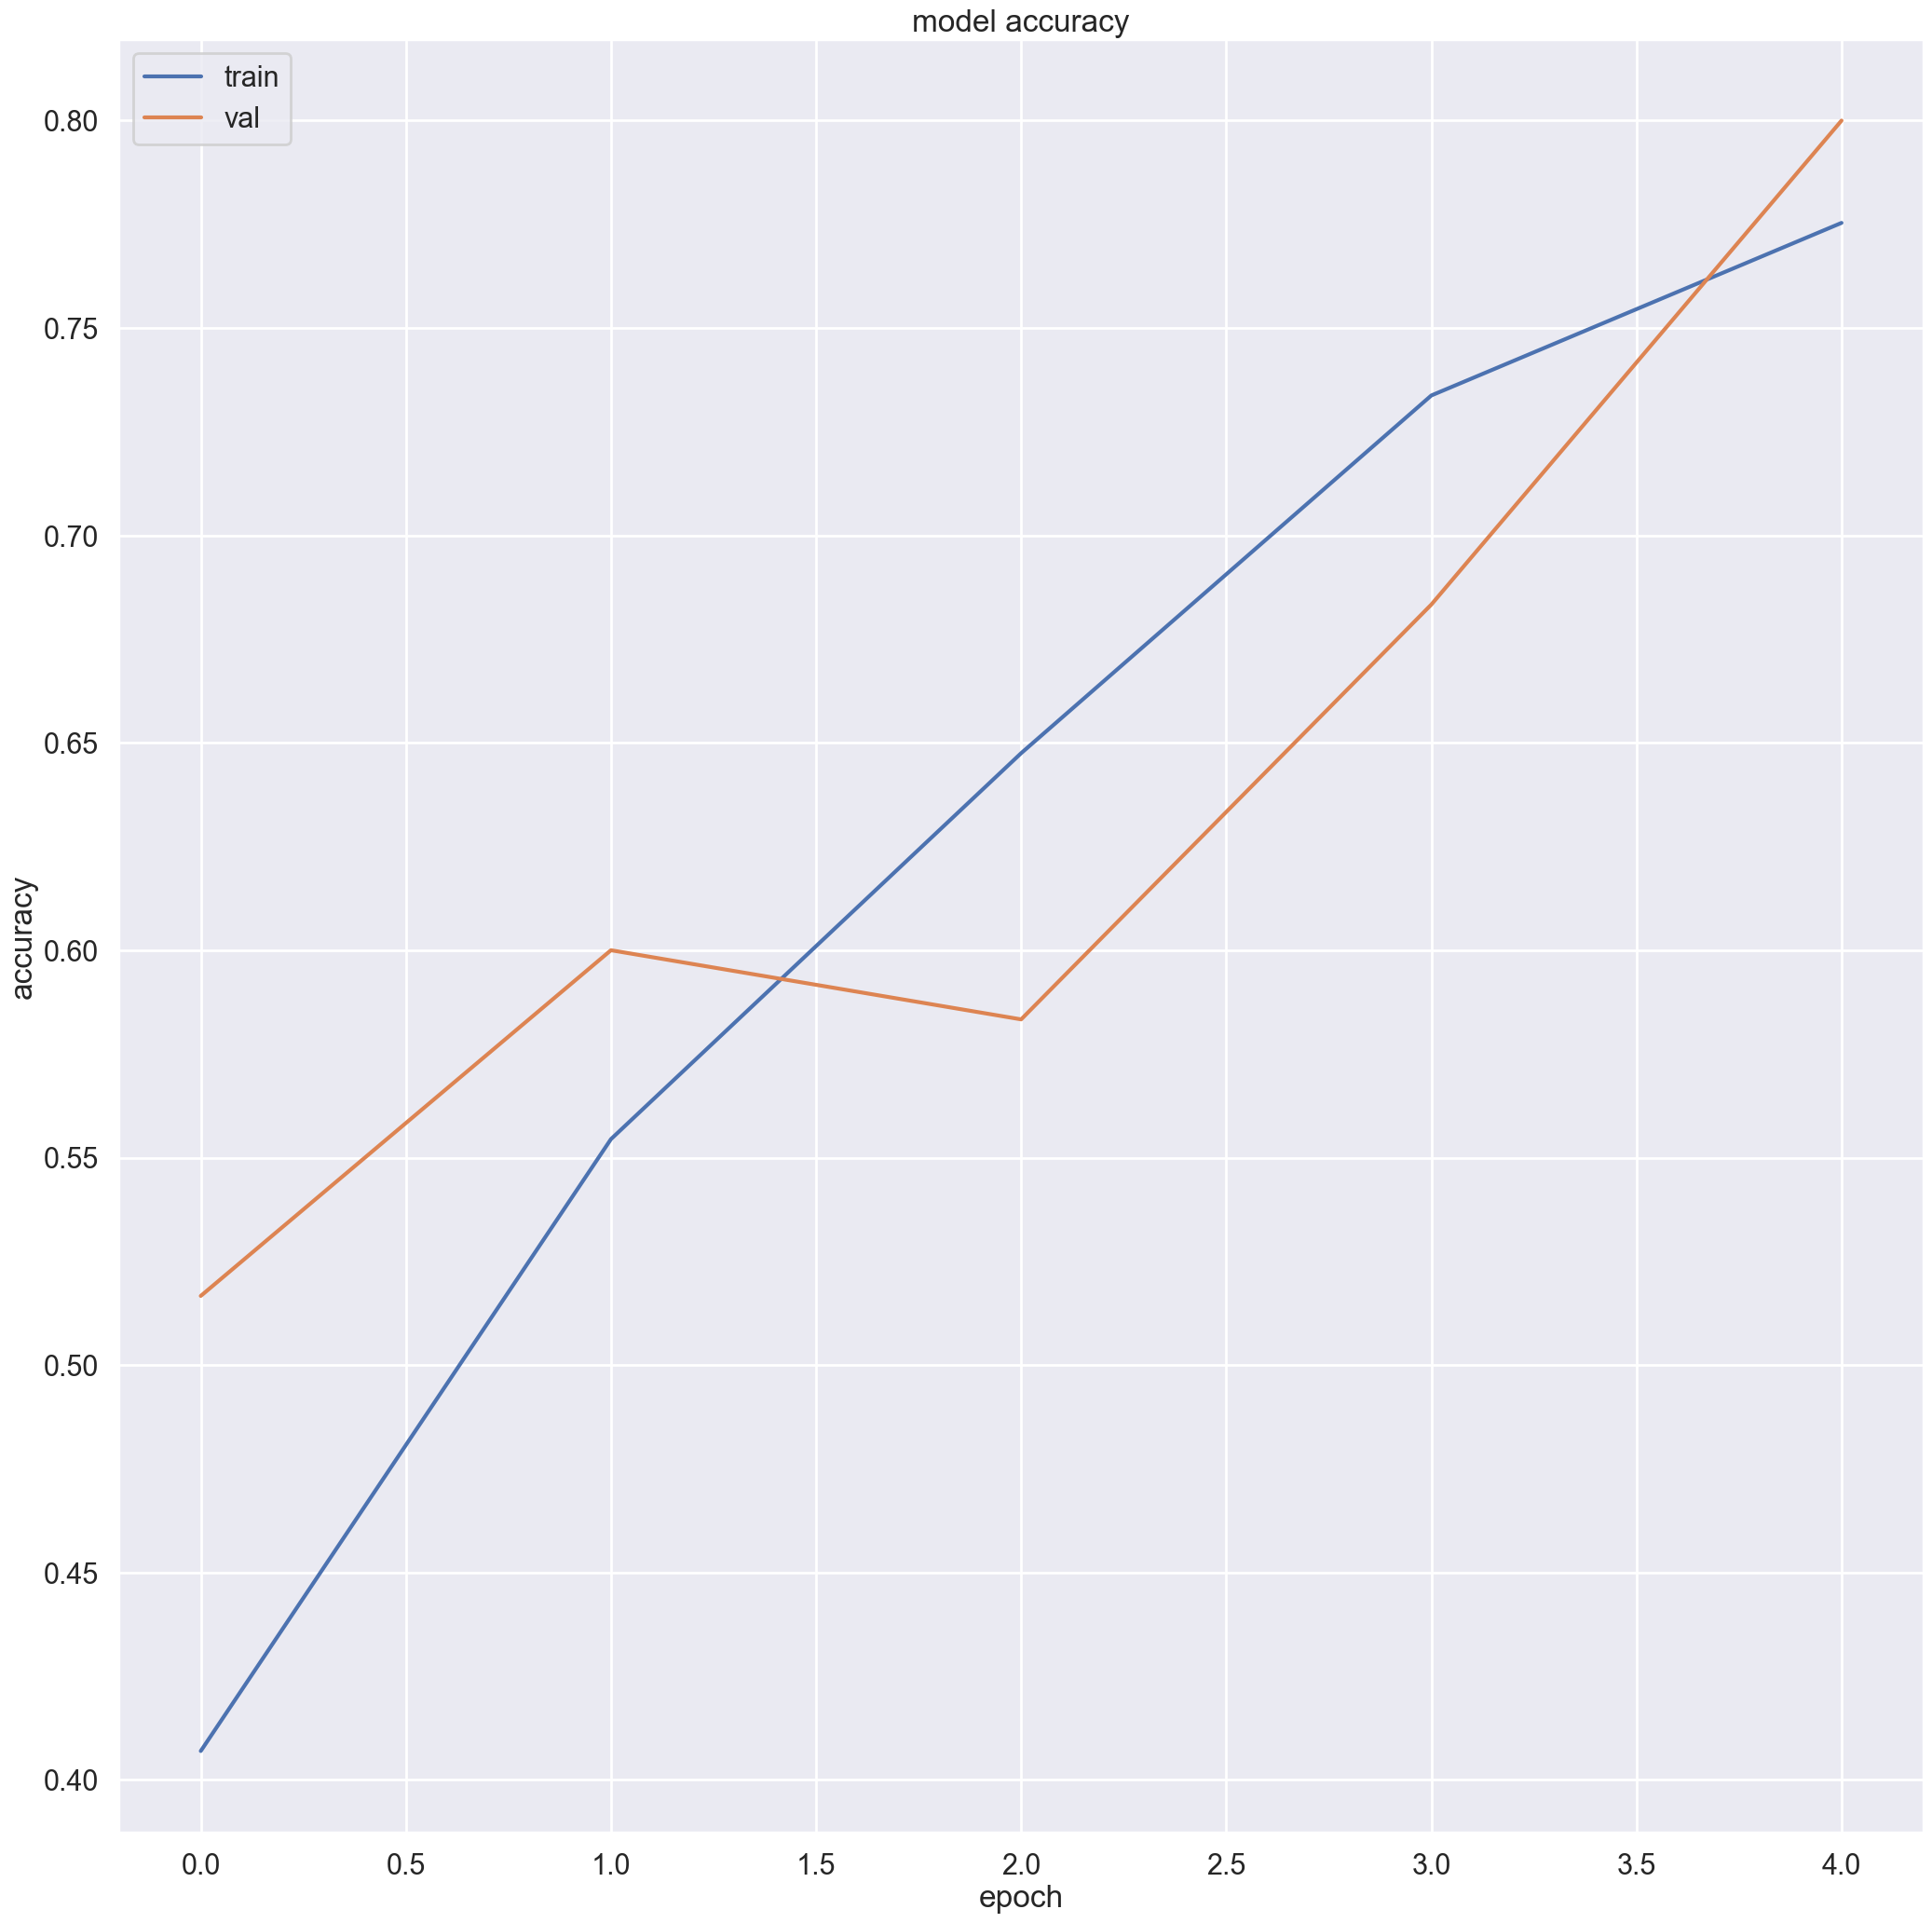

In [26]:
sns.set_theme()
sns.set_context('poster')

figure(figsize=(25,25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

Since the train and validation accuracies do not have much difference between them, it is evident that our CNN model is performing pretty good and is not facing any overfitting or underfitting issue.

In [27]:
model.save('plant.h5')                                           # saving the model for future purposes and easy accessing

In [29]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array             # to check predictions on test data

def preprocess_image(image_path,target_size=(225,225)):
    img = load_img(image_path, target_size = target_size)
    x = img_to_array(img)
    x = x.astype('float32')/255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r"C:\Users\revad\Downloads\archive\Test\Test\Rust\82f49a4a7b9585f1.jpg")

In [30]:
pred = model.predict(x)
pred[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([3.3136210e-01, 2.7534174e-04, 6.6836250e-01], dtype=float32)

In [34]:
labels = train_generator.class_indices
labels = {v:k for k,v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [36]:
pred_val = labels[np.argmax(pred)]
pred_val

'Rust'